# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [108]:
!pip install haversine

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
from haversine import haversine
# shows all the dataframe's columns
pd.set_option('display.max_columns', 999)
# converts exponencial numbers to float numbers
# pd.options.display.float_format = '{:,.0f}'.format 

## Step 1: Read in Data

In [109]:
test = pd.read_csv('kc_house_data_test_features.csv')
train = pd.read_csv('kc_house_data_train.csv')

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [110]:
train.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [111]:
test.tail()

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4318,4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
4322,4322,1523300157,20141015T000000,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
Unnamed: 0       17290 non-null int64
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

In [113]:
train.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [114]:
train.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [115]:
train.isna().any()

Unnamed: 0       False
id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [116]:
# UNCOMMENT THIS CELL

# train.hist(bins=50, figsize=(20,15))
# plt.show()

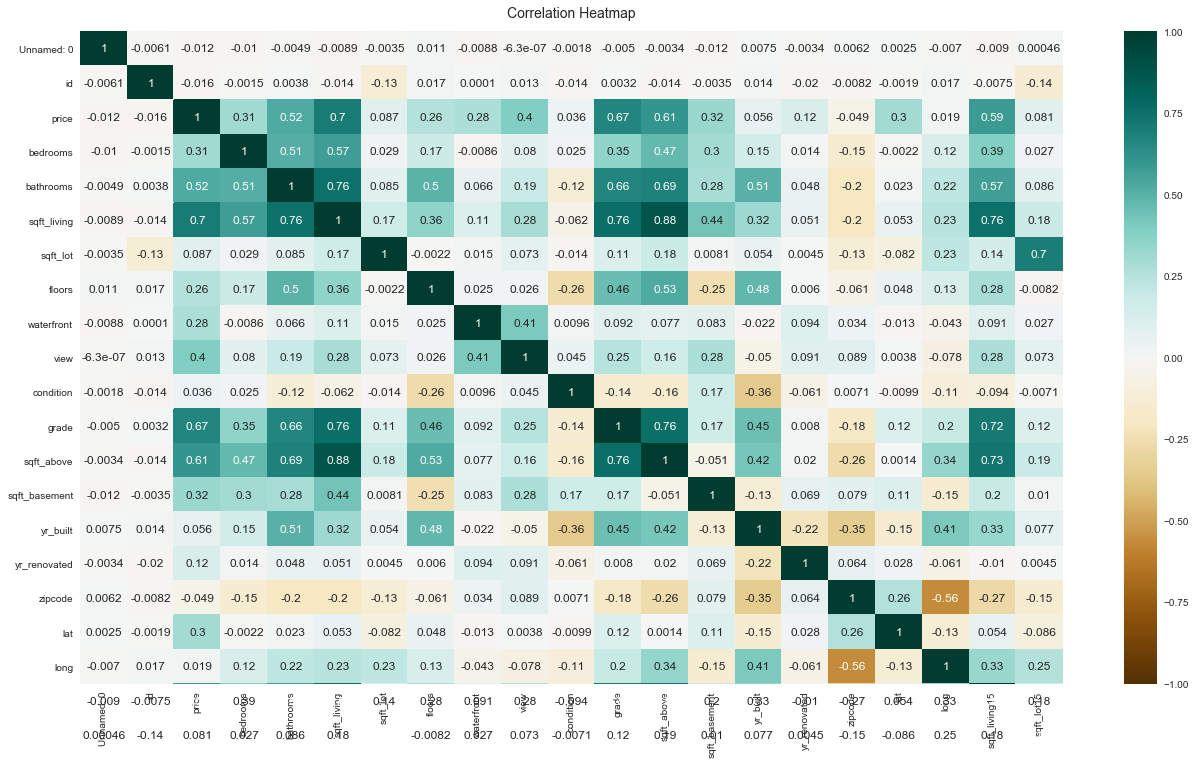

In [117]:
# Increase the size of the heatmap
plt.figure(figsize=(22, 12))
plt.savefig('destination_path.eps', format='eps')
# Store the heatmap variable to use easily when applying other features
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"size": 12})
# This fixes a randering problem on the top and bottom of the heatmap
plt.ylim([19,0])
plt.style.use('seaborn')
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);

In [118]:
# IMPORTANT: since the code bellow takes several seconds to load, I commented it.
# Uncomment this code to see the matrix plot

#scatterplot matrix
# sns.pairplot(train)

In [119]:
train.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703540
grade            0.666215
sqft_above       0.607760
sqft_living15    0.585567
bathrooms        0.524335
view             0.395485
sqft_basement    0.323312
bedrooms         0.305106
lat              0.302394
waterfront       0.275779
floors           0.256985
yr_renovated     0.117770
sqft_lot         0.086803
sqft_lot15       0.081423
yr_built         0.056450
condition        0.036099
long             0.019327
Unnamed: 0      -0.012306
id              -0.015644
zipcode         -0.048958
Name: price, dtype: float64

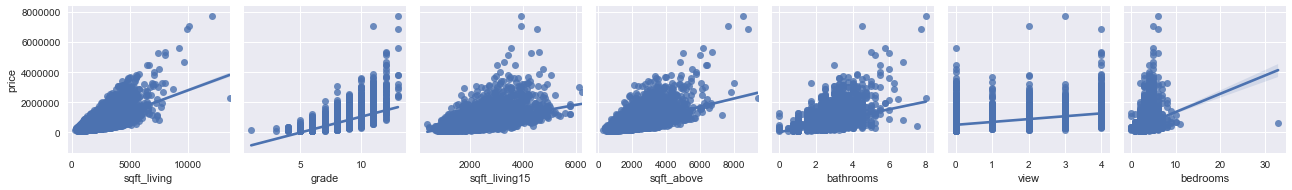

In [120]:
# IMPORTANT: since the code bellow takes several seconds to load, I commented it.
# Uncomment this code to see the matrix plot

#scatterplot matrix
sns.pairplot(train, x_vars=["sqft_living", "grade", "sqft_living15","sqft_above","bathrooms", "view", 
                                "bedrooms",],y_vars="price",kind = 'reg');

In [121]:
df_2 = train[["sqft_living", "grade", "sqft_living15","sqft_above","bathrooms", "view", "bedrooms"]]
abs(df_2.corr()) >.6

,sqft_living,grade,sqft_living15,sqft_above,bathrooms,view,bedrooms
sqft_living,True,True,True,True,True,False,False
grade,True,True,True,True,True,False,False
sqft_living15,True,True,True,True,False,False,False
sqft_above,True,True,True,True,True,False,False
bathrooms,True,True,False,True,True,False,False
view,False,False,False,False,False,True,False
bedrooms,False,False,False,False,False,False,True


In [122]:
# Let's drop a few columns that have very low or none correlation with the price

train.drop(columns=['sqft_lot15','sqft_lot'],inplace=True)

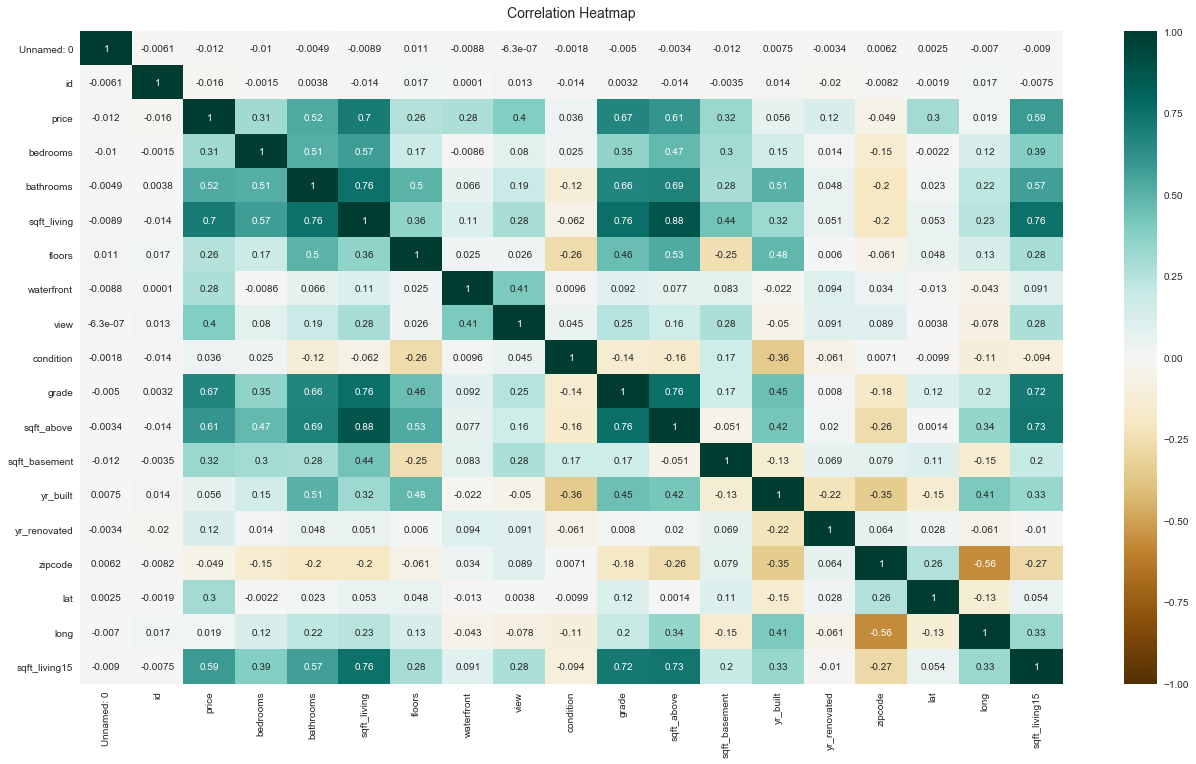

In [123]:
# Increase the size of the heatmap
plt.figure(figsize=(22, 12))
plt.savefig('destination_path.eps', format='eps')
# Store the heatmap variable to use easily when applying other features
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws={"size": 10})
# This fixes a randering problem on the top and bottom of the heatmap
plt.ylim([19,0])
plt.style.use('seaborn')
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);

In [124]:
x_sqft_living = train['sqft_living']
y = train['price']

In [125]:
model_main = ols(formula = "y~x_sqft_living", data=train).fit()
model_main.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.694e+04
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:18:17   Log-Likelihood:            -2.4046e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.347e+04   4991.006    -10.714      0.000   -6.33e+04   -4.37e+04
x_sqft_living   285.4779      2.193    130.167      0.000     281.179     289.777
==============================================================================
Omnibus:                    12367.474   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507839.480
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      28.878   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
print(model_main.params)

Intercept       -53472.566426
x_sqft_living      285.477886
dtype: float64


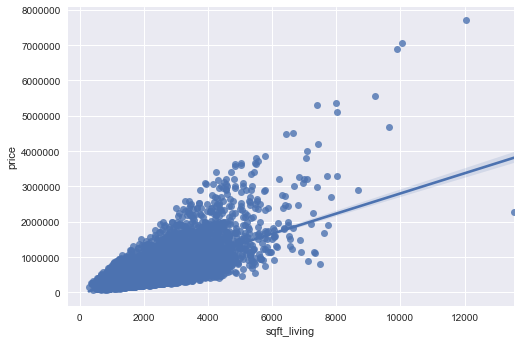

In [127]:
sns.regplot(x=x_sqft_living,y=y,data=train);

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [128]:
train.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


In [129]:
print(train.price.isna().any())

False


In [130]:
train.nlargest(5,'bedrooms')

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
8597,8597,2402100895,20140625T000000,640000.0,33,1.75,1620,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330
2356,2356,1773100755,20140821T000000,520000.0,11,3.00,3000,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420
3680,3680,8812401450,20141229T000000,660000.0,10,3.00,2920,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810
11181,11181,627300145,20140814T000000,1148000.0,10,5.25,4590,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730
17114,17114,5566100170,20141029T000000,650000.0,10,2.00,3610,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040


Using the house id, I was able to find the house with 33 bedrooms on Zillow. It turns out that there was a typo, thus I'll fix it.

https://clustrmaps.com/a/1lcrrt/

https://www.zillow.com/homedetails/8023-Corliss-Ave-N-Seattle-WA-98103/48795792_zpid/

In [131]:
# This fixes the house with 33 bedrooms turning it into a 3-bedroom house
train[train['bedrooms'] == 33] = train[train['bedrooms'] == 3]

In [132]:
# IMPORTANT - UNCOMMENT THIS

# sns.pairplot(train, x_vars=["sqft_living", "grade", "sqft_living15", "bathrooms", "view", 
#                                 "bedrooms",],y_vars="price",kind = 'reg');

### Findings:

- There is a house with 33 bedrooms
- There is/are property/properties with 0 bathroom

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [133]:
# I'll create a temporary copy in case something goes wrong
df = train.copy()
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,0.0,2.591820e+09,20141006T000000,365000.0,4.0,2.25,2070.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0
1,1.0,7.974201e+09,20140821T000000,865000.0,5.0,3.00,2900.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0
2,2.0,7.701450e+09,20140815T000000,1038000.0,4.0,2.50,3770.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0
3,3.0,9.522300e+09,20150331T000000,1490000.0,3.0,3.50,4560.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0
4,4.0,9.510861e+09,20140714T000000,711000.0,3.0,2.50,2550.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0


### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [134]:
df_zip_dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df_zips = pd.concat([df, df_zip_dummies], axis=1)
#Drop a single column post-.get_dummies() to eliminate information redundancy
df_zips.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98103.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
0,0.0,2.591820e+09,20141006T000000,365000.0,4.0,2.25,2070.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,7.974201e+09,20140821T000000,865000.0,5.0,3.00,2900.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,7.701450e+09,20140815T000000,1038000.0,4.0,2.50,3770.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,9.522300e+09,20150331T000000,1490000.0,3.0,3.50,4560.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,9.510861e+09,20140714T000000,711000.0,3.0,2.50,2550.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [135]:
# This code fixes the
df_zips['date_sold'] = pd.to_datetime(train['date'])
df_zips['year_sold'] = df_zips.date_sold.dt.year
df_zips['month_sold'] = df_zips.date_sold.dt.month
df_zips.drop(columns=['date'],inplace=True)
df_zips.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98103.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0,date_sold,year_sold,month_sold
0,0.0,2.591820e+09,365000.0,4.0,2.25,2070.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-10-06,2014.0,10.0
1,1.0,7.974201e+09,865000.0,5.0,3.00,2900.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-08-21,2014.0,8.0
2,2.0,7.701450e+09,1038000.0,4.0,2.50,3770.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-08-15,2014.0,8.0
3,3.0,9.522300e+09,1490000.0,3.0,3.50,4560.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-03-31,2015.0,3.0
4,4.0,9.510861e+09,711000.0,3.0,2.50,2550.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014-07-14,2014.0,7.0


In [136]:
print(df_zips.shape)

(17290, 91)


In [137]:
df_zips.columns

Index([   'Unnamed: 0',            'id',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',       'zipcode',
                 'lat',          'long', 'sqft_living15',         98002.0,
               98003.0,         98004.0,         98005.0,         98006.0,
               98007.0,         98008.0,         98010.0,         98011.0,
               98014.0,         98019.0,         98022.0,         98023.0,
               98024.0,         98027.0,         98028.0,         98029.0,
               98030.0,         98031.0,         98032.0,         98033.0,
               98034.0,         98038.0,         98039.0,         98040.0,
               98042.0,         98045.0,         98052.0,         98053.0,
               98055.0,         98056.0,         98058.0,         98059.0,
               98065.0,  

In [164]:
mlr_model = ols(formula='price~bedrooms+bathrooms+floors+condition+sqft_basement+yr_built+yr_renovated+zipcode', data=df).fit() 
# mlr_model.summary() predict the mpg using weight, horsepower, etc...
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     1243.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:18:34   Log-Likelihood:            -2.4242e+05
No. Observations:               17289   AIC:                         4.849e+05
Df Residuals:                   17280   BIC:                         4.849e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.862e+07   4.65e+06      8.304      0.000    2.95e+07    4.77e+07
bedrooms      -5057.2157   3006.412     -1.682      0.093    -1.1e+04     835.657
bathrooms      2.499e+05   4708.546     53.063      0.000    2.41e+05    2.59e+05
floors         1.266e+05   5698.782     22.207      0.000    1.15e+05    1.38e+05
condition      1.137e+04   3859.382      2.947      0.003    3807.638    1.89e+04
sqft_basement   159.9717      6.319     25.318      0.000     147.587     172.357
yr_built      -3448.1343    112.528    -30.643      0.000   -3668.700   -3227.569
yr_renovated     21.3133      6.018      3.542      0.000       9.517      33.109
zipcode        -326.9986     46.633     -7.012      0.000    -418.403    -235.594
==============================================================================
Omnibus:                    14026.085   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           796103.127
Skew:                           3.498   Prob(JB):                         0.00
Kurtosis:                      35.499   Cond. No.                     2.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [165]:
# your code here

### <ins>Non-linear transformations</ins>

In [166]:
df_zips.columns

Index([   'Unnamed: 0',            'id',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',       'zipcode',
                 'lat',          'long', 'sqft_living15',         98002.0,
               98003.0,         98004.0,         98005.0,         98006.0,
               98007.0,         98008.0,         98010.0,         98011.0,
               98014.0,         98019.0,         98022.0,         98023.0,
               98024.0,         98027.0,         98028.0,         98029.0,
               98030.0,         98031.0,         98032.0,         98033.0,
               98034.0,         98038.0,         98039.0,         98040.0,
               98042.0,         98045.0,         98052.0,         98053.0,
               98055.0,         98056.0,         98058.0,         98059.0,
               98065.0,  

In [168]:
features=['bedrooms',
           'bathrooms',   'sqft_living',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',       'zipcode',
                 'lat',          'long', 'sqft_living15',         98002.0,
               98003.0,         98004.0,         98005.0,         98006.0,
               98007.0,         98008.0,         98010.0,         98011.0,
               98014.0,         98019.0,         98022.0,         98023.0,
               98024.0,         98027.0,         98028.0,         98029.0,
               98030.0,         98031.0,         98032.0,         98033.0,
               98034.0,         98038.0,         98039.0,         98040.0,
               98042.0,         98045.0,         98052.0,         98053.0,
               98055.0,         98056.0,         98058.0,         98059.0,
               98065.0,         98070.0,         98072.0,         98074.0,
               98075.0,         98077.0,         98092.0,         98102.0,
               98105.0,         98106.0,         98107.0,         98108.0,
               98109.0,         98112.0,         98115.0,         98116.0,
               98117.0,         98118.0,         98119.0,         98122.0,
               98125.0,         98126.0,         98133.0,         98136.0,
               98144.0,         98146.0,         98148.0,         98155.0,
               98166.0,         98168.0,         98177.0,         98178.0,
               98188.0,         98198.0,         98199.0,     'date_sold',
           'year_sold',    'month_sold']
df_features = df_zips[features]
target = df_zips['price']
df_features.describe()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0,year_sold,month_sold
count,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17290.00000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17289.000000,17289.000000
mean,3.370756,2.111964,2081.491295,1.490341,0.007982,0.238533,3.408410,7.654462,1789.349355,292.141940,1970.793395,83.811152,98078.191740,47.560051,-122.214252,1988.024756,0.00908,0.012955,0.013707,0.008097,0.022267,0.007056,0.013071,0.004280,0.009427,0.005842,0.008386,0.010931,0.023713,0.003759,0.019202,0.012666,0.014459,0.011625,0.012435,0.005957,0.020532,0.025159,0.026316,0.002429,0.013245,0.024465,0.010179,0.027415,0.018739,0.012146,0.019433,0.022267,0.021573,0.014401,0.005726,0.012435,0.020706,0.016541,0.009370,0.016541,0.004627,0.009832,0.015385,0.012261,0.008733,0.004916,0.012493,0.026894,0.015385,0.025275,0.023713,0.008618,0.013592,0.018566,0.016079,0.023135,0.012377,0.015558,0.014228,0.002487,0.020243,0.012088,0.012435,0.012608,0.012435,0.006304,0.012724,0.015385,2014.323153,6.570594
std,0.911945,0.770494,920.038453,0.538912,0.088987,0.775249,0.651202,1.174742,829.269508,443.159284,29.343807,400.340447,53.609167,0.138413,0.140859,684.804154,0.09486,0.113086,0.116277,0.089622,0.147556,0.083706,0.113583,0.065283,0.096639,0.076209,0.091195,0.103982,0.152158,0.061200,0.137238,0.111833,0.119377,0.107195,0.110820,0.076955,0.141816,0.156613,0.160077,0.049228,0.114324,0.154492,0.100381,0.163293,0.135606,0.109540,0.138046,0.147556,0.145289,0.119142,0.075455,0.110820,0.142401,0.127549,0.096345,0.127549,0.067866,0.098672,0.123080,0.110054,0.093046,0.069945,0.111074,0.161779,0.123080,0.156963,0.152158,0.092433,0.115792,0.134989,0.125782,0.150336,0.110565,0.123762,0.118432,0.049809,0.140834,0.109282,0.110820,0.111580,0.110820,0.079151,0.112085,0.123080,0.467694,3.117086
min,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

### 4.4) Create a polynomial feature for two of your continuous variables.

In [169]:
# df_zips['price^2'] = df['price']**2

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

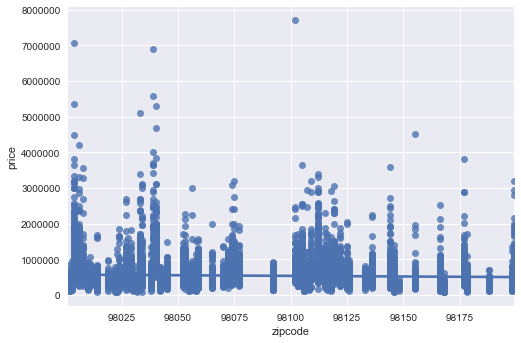

In [170]:
sns.regplot('zipcode','price',data=df_zips)

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [171]:
df_features.drop(columns=['date_sold',     'year_sold',    'month_sold'],inplace=True)
print(df_features.columns)
print(df_features.shape)
df_features.dropna()
print(df_features.shape)

Index([     'bedrooms',     'bathrooms',   'sqft_living',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
             'zipcode',           'lat',          'long', 'sqft_living15',
               98002.0,         98003.0,         98004.0,         98005.0,
               98006.0,         98007.0,         98008.0,         98010.0,
               98011.0,         98014.0,         98019.0,         98022.0,
               98023.0,         98024.0,         98027.0,         98028.0,
               98029.0,         98030.0,         98031.0,         98032.0,
               98033.0,         98034.0,         98038.0,         98039.0,
               98040.0,         98042.0,         98045.0,         98052.0,
               98053.0,         98055.0,         98056.0,         98058.0,
               98059.0,         98065.0,         98070.0,         98072.0,
               98074.0,  

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [172]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=3,test_size=0.2)


# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 84) Target:  (13832,)
Test set - Features:  (3458, 84) Target:  (3458,)


In [173]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(3458,)

### 5.2) Fit your scaler to training the data.

In [174]:
# Instantiate a linear regression object
lm = LinearRegression()

# Fitting linear regression to the data
lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)
print ("\nR^2 Score:", lm.score(X_train, y_train))

-274750365.8965442
[-3.13743378e+04  2.05450237e+04  2.33115481e+14 -4.36360774e+04
  6.80801612e+05  5.52773844e+04  2.72859102e+04  5.20852661e+04
 -2.33115481e+14 -2.33115481e+14 -7.48041504e+02  1.78125000e+01
  2.59576172e+03  1.92561737e+05 -1.00073663e+05  9.09375000e+00
  2.51013615e+04 -2.84029485e+04  7.22283927e+05  2.34294858e+05
  2.07489037e+05  1.90787309e+05  1.80222648e+05  6.12707065e+04
  1.96476409e+04  5.39765508e+04  2.41156836e+03 -2.01303794e+04
 -1.01286292e+05  9.28402056e+04  9.03426660e+04 -2.75511877e+04
  1.15198606e+05 -6.92025078e+04 -7.20223364e+04 -8.39650161e+04
  2.14080457e+05  5.19436836e+04 -4.98103647e+04  1.18980654e+06
  3.47983731e+05 -8.41407908e+04  9.73649805e+03  4.19527822e+04
  7.03414453e+03 -1.13356910e+05 -8.12378020e+04 -1.29115667e+05
 -9.25347510e+04 -7.58723164e+04 -2.33680242e+05 -9.51031982e+04
 -5.20046000e+04 -5.45934177e+04 -1.41392296e+05 -2.58070568e+05
  2.08230870e+05  1.47311866e+05 -1.74299458e+05 -2.75570264e+03
 -1.96

In [175]:
y_train_pred = lm.predict(X_train)

In [176]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 97086.20036885877
Mean Squared Error: 26920849232.17483
Root Mean Squared Error: 164075.74236362556


In [177]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_test.dropna(inplace=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13832, 84)
(13832,)
(3458, 84)
(3458,)
(13832, 84)
(13832,)
(3457, 84)
(3457,)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### 5.3) Transform the testing set with the scaler.

In [178]:
y_pred = lm.predict(X_test)

In [179]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7941667858669097


In [180]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:97961.32481358762
Mean Squared Error:28617167973.637592
Root Mean Squared Error:169166.09581602807


In [181]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  164075 vs. Testing:  169166


In [182]:
# X_train.columns

In [183]:
# print(X_train.shape)
# print(y_train.shape)
# # print(X_test.shape)
# # print(y_test.shape)
# X_train.dropna(inplace=True)
# y_train.dropna(inplace=True)
# # X_test.dropna(inplace=True)
# # y_test.dropna(inplace=True)
# print(X_train.shape)
# print(y_train.shape)
# # print(X_test.shape)
# # print(y_test.shape)

In [184]:
# # Instantiate a linear regression object
# lm = LinearRegression()

# # Fitting linear regression to the data
# lm.fit(X_train, y_train)


# print(lm.intercept_)
# print(lm.coef_)
# print ("\nR^2 Score:", lm.score(X_train, y_train))

In [185]:
# y_pred = lm.predict(X_test)

### 5.3) Transform the testing set with the scaler.

In [186]:
#your code here 

### 5.4) Fit the model to the training data.

In [187]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [188]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [189]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  164075 vs. Testing:  169166


### 5.7) Determine if your model is overfit.

In [190]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [191]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [192]:
# Create correlation matrix
corr_matrix = X_train_2.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper_triangle

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
bedrooms,NaN,0.525988,0.586833,0.179295,0.007170,0.078207,0.016249,0.363426,0.487790,0.306300,0.164562,0.012283,0.146262,0.007570,0.120472,0.398801,0.006885,0.007027,0.056778,0.041876,0.075640,0.036063,0.049932,0.002799,0.022966,0.032447,0.003141,0.027352,0.008086,0.006184,0.030757,0.019934,0.000016,0.015047,0.019068,0.005265,0.035182,0.013952,0.013210,0.034994,0.089252,0.003311,0.019383,0.046091,0.025775,0.012854,0.008245,0.024904,0.053280,0.013077,0.050607,0.005380,0.038892,0.064400,0.028354,0.013133,0.000552,0.012094,0.038319,0.048347,0.022963,0.004869,0.018281,0.033795,0.036781,0.066001,0.051990,0.010566,0.024196,0.022088,0.070821,0.042096,0.044181,0.011301,0.032484,0.008803,0.003425,0.006341,0.045324,0.000513,0.001170,0.005945,0.020400,0.015049
bathrooms,NaN,NaN,0.754349,0.492788,0.072572,0.188259,0.123752,0.664310,0.684117,0.288197,0.507666,0.051486,0.192993,0.021962,0.215501,0.565768,0.037281,0.014471,0.064102,0.031609,0.086745,0.003100,0.002801,0.008229,0.017616,0.006898,0.020478,0.027898,0.006346,0.008718,0.070414,0.007254,0.066952,0.005800,0.008998,0.042331,0.037649,0.000983,0.058324,0.071471,0.089701,0.000311,0.001136,0.052954,0.056446,0.022219,0.011343,0.006601,0.048077,0.065853,0.023387,0.015196,0.072317,0.097653,0.045455,0.025216,0.022079,0.004276,0.045930,0.010067,0.016439,0.007516,0.039519,0.053545,0.024160,0.070617,0.078558,0.007482,0.004291,0.049432,0.066858,0.078347,0.031009,0.006752,0.078472,0.021374,0.054669,0.020051,0.098352,0.001381,0.045547,0.021274,0.050226,0.011855
sqft_living,NaN,NaN,NaN,0.351481,0.121825,0.285018,0.062243,0.760045,0.874432,0.442071,0.316552,0.052992,0.187317,0.051588,0.228655,0.751840,0.049460,0.026741,0.114036,0.050507,0.132258,0.001274,0.010191,0.001838,0.012619,0.003479,0.009521,0.028974,0.015862,0.018566,0.072074,0.005720,0.022868,0.013488,0.016059,0.029996,0.048697,0.018208,0.013041,0.083479,0.130378,0.021707,0.007875,0.046212,0.079361,0.032928,0.007824,0.007174,0.051072,0.063070,0.014968,0.028723,0.087491,0.129361,0.080882,0.021236,0.019474,0.009023,0.074333,0.059126,0.036193,0.000193,0.056676,0.047727,0.033294,0.078410,0.069034,0.010034,0.040699,0.046675,0.066134,0.074863,0.042615,0.018982,0.056771,0.025137,0.045285,0.007493,0.074998,0.023685,0.037132,0.024044,0.041096,0.017426
floors,NaN,NaN,NaN,NaN,0.026492,0.025197,0.257302,0.456864,0.526316,0.249469,0.481175,0.008321,0.058914,0.045285,0.124664,0.277179,0.029916,0.037779,0.009905,0.042043,0.011813,0.018158,0.061654,0.000180,0.000967,0.008392,0.033646,0.031350,0.050724,0.004383,0.048861,0.014425,0.104038,0.002645,0.004299,0.034312,0.002357,0.052553,0.073386,0.006803,0.006815,0.000362,0.003456,0.022655,0.044355,0.021200,0.017168,0.028897,0.038836,0.087633,0.009396,0.010146,0.059174,0.080339,0.022384,0.032343,0.066395,0.012792,0.024572,0.065832,0.018979,0.031739,0.064778,0.017672,0.004522,0.009573,0.051086,0.054868,0.069095,0.036143,0.028892,0.026462,0.002147,0.032380,0.056622,0.023408,0.066959,0.045396,0.071139,0.049543,0.059659,0.041787,0.057535,0.014612
waterfront,NaN,NaN,NaN,NaN,NaN,0.418470,0.006783,0.096857,0.083272,0.096851,0.020012,0.094711,0.033317,0.006147,0.039222,0.098344,0.008894,0.010562,0.004147,0.008306,0.003818,0.007916,0.037902,0.006020,0.009001,0.007208,0.008642,0.010162,0.005632,0.005643,0.007301,0.003110,0.011208,0.009972,0.0

In [193]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train_2.drop(columns=to_drop, inplace=False)
X_test_2.drop(columns=to_drop, inplace=False)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,98014.0,98019.0,98022.0,98023.0,98024.0,98027.0,98028.0,98029.0,98030.0,98031.0,98032.0,98033.0,98034.0,98038.0,98039.0,98040.0,98042.0,98045.0,98052.0,98053.0,98055.0,98056.0,98058.0,98059.0,98065.0,98070.0,98072.0,98074.0,98075.0,98077.0,98092.0,98102.0,98105.0,98106.0,98107.0,98108.0,98109.0,98112.0,98115.0,98116.0,98117.0,98118.0,98119.0,98122.0,98125.0,98126.0,98133.0,98136.0,98144.0,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
13347,4.0,2.75,1610.0,1.0,0.0,0.0,5.0,7.0,1020.0,590.0,1982.0,0.0,98033.0,47.7024,-122.198,1610.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12171,3.0,2.00,1610.0,1.0,0.0,0.0,4.0,7.0,1610.0,0.0,1967.0,0.0,98042.0,47.3398,-122.133,1610.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5900,3.0,1.75,1900.0,1.0,0.0,0.0,3.0,7.0,1280.0,620.0,1982.0,0.0,98118.0,47.5549,-122.292,1330.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7160,4.0,3.50,2690.0,2.0,0.0,0.0,3.0,7.0,2690.0,0.0,2007.0,0.0,98038.0,47.3537,-122.018,2210.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13494,3.0,1.75,1170.0,1.0,0.0,0.0,4.0,7.0,1170.0,0.0,1968.0,0.0,98052.0,47.6849,-122.117,1870.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,4.0,2.25,1900.0,1.0,0.0,0.0,4.0,7.0,1400.0,500.0,1959.0,0.0,98032.0,47.3582,-122.284,1700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11094,4.0,2.50,1870.0,1.0,0.0,0.0,3.0,7.0,1100.0,770.0,1977.0,0.0,98058.0,47.4521,-122.161,1590.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5004,4.0,2.25,2320.0,1.0,0.0,0.0,4.0,8.0,1160.0,1160.0,1966.0,0.0,98032.0,47.3627,-122.285,1970.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5925,3.0,3.25,1530.0,2.0,0.0,0.0,3.0,8.0,1200.0,330.0,2007.0,0.0,98117.0,47.6783,-122.366,1390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
to_drop

[]

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [195]:
X_train.shape

(13832, 84)

In [196]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7fb008755620>)

In [197]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [198]:
len(list(removed_columns))

64

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [199]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 187737.51016305137
Testing Root Mean Squared Error: 192720.09990107166


### TEST 1

In [200]:
X_train.shape

(13832, 84)

In [201]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=8)

selector.fit(X_train, y_train)

SelectKBest(k=8, score_func=<function f_regression at 0x7fb008755620>)

In [202]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [203]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 240808.98392162236
Testing Root Mean Squared Error: 245041.13383582


### TEST 2 - Log Transformation

In [204]:
df2 = df_features.copy()

In [205]:
# df2.hist(figsize=(15,15),bins=30);

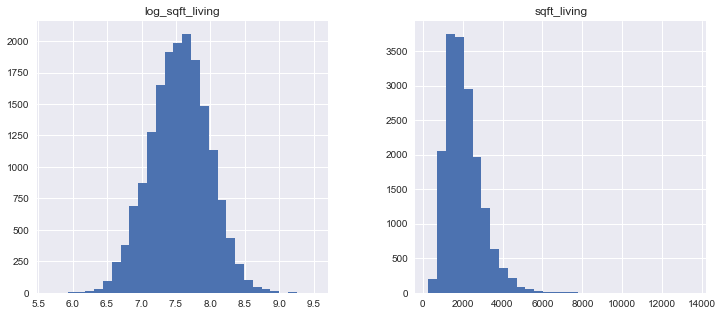

In [206]:
#Engineer the log transformation
df2['log_sqft_living'] = np.log(df2['sqft_living'])

#Plot histograms to compare the original vs. log transformed version of variable
df2[['sqft_living', 'log_sqft_living']].hist(figsize=(12,5),bins=30);

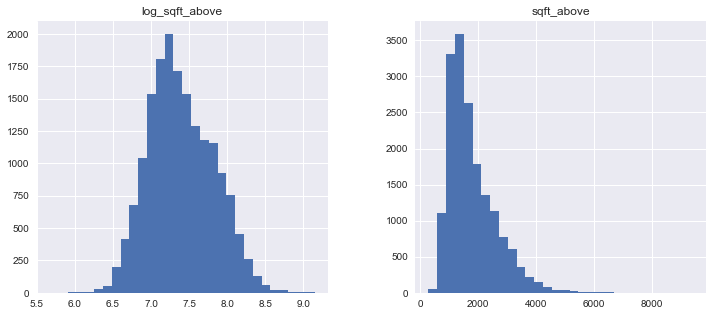

In [207]:
#Engineer the log transformation
df2['log_sqft_above'] = np.log(df2['sqft_above'])

#Plot histograms to compare the original vs. log transformed version of variable
df2[['sqft_above', 'log_sqft_above']].hist(figsize=(12,5),bins=30);

In [208]:
#Re-visualize all of our current models original & log transformed variables
# df2.hist(figsize=(12,12),bins=30);

In [209]:
df3 = df2.drop(columns=['sqft_above','sqft_living'])

In [210]:
df3.head().T

,0,1,2,3,4
bedrooms,4.000000,5.000000,4.00000,3.000000,3.000000
bathrooms,2.250000,3.000000,2.50000,3.500000,2.500000
floors,2.000000,1.000000,2.00000,2.000000,2.000000
waterfront,0.000000,0.000000,0.00000,0.000000,0.000000
view,0.000000,0.000000,2.00000,2.000000,0.000000
...,...,...,...,...,...
98188.0,0.000000,0.000000,0.00000,0.000000,0.000000
98198.0,0.000000,0.000000,0.00000,0.000000,0.000000
98199.0,0.000000,0.000000,0.00000,0.000000,0.000000
log_sqft_living,7.635304,7.972466,8.23483,8.425078,7.843849


In [211]:
print(df3.columns)
print(df3.shape)
df3.dropna()
print(df3.shape)

Index([       'bedrooms',       'bathrooms',          'floors',
            'waterfront',            'view',       'condition',
                 'grade',   'sqft_basement',        'yr_built',
          'yr_renovated',         'zipcode',             'lat',
                  'long',   'sqft_living15',           98002.0,
                 98003.0,           98004.0,           98005.0,
                 98006.0,           98007.0,           98008.0,
                 98010.0,           98011.0,           98014.0,
                 98019.0,           98022.0,           98023.0,
                 98024.0,           98027.0,           98028.0,
                 98029.0,           98030.0,           98031.0,
                 98032.0,           98033.0,           98034.0,
                 98038.0,           98039.0,           98040.0,
                 98042.0,           98045.0,           98052.0,
                 98053.0,           98055.0,           98056.0,
                 98058.0,           9805

In [212]:
#call train_test_split on the data and capture the results
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df3, target, random_state=3,test_size=0.2)


# Checking if the training set was correcly splitted
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 84) Target:  (13832,)
Test set - Features:  (3457, 84) Target:  (3457,)


In [213]:
# Instantiate a linear regression object
lm = LinearRegression()

# Fitting linear regression to the data
lm.fit(X_train_2, y_train_2)


print(lm.intercept_)
print(lm.coef_)
print ("\nR^2 Score:", lm.score(X_train_2, y_train_2))

-249766585.78574765
[-1.57930237e+04  5.82715316e+04 -3.70922484e+04  7.06382669e+05
  4.56597805e+04  2.52243201e+04  8.20748092e+04  3.04477575e+02
 -1.23762651e+03  1.49291641e+01  2.44743174e+03  1.92218268e+05
 -1.24296433e+04  5.70649771e+01  2.52938070e+04 -3.51730495e+04
  6.95993325e+05  1.99707682e+05  1.72502391e+05  1.49988816e+05
  1.51530480e+05  6.73530539e+04  4.44238383e+03  4.97587295e+04
 -2.10843969e+04 -3.75621710e+04 -9.39584607e+04  1.01753408e+05
  6.12218157e+04 -3.88252261e+04  7.24279403e+04 -8.50578409e+04
 -8.48393823e+04 -8.26891815e+04  2.03081050e+05  3.64273203e+04
 -6.69614965e+04  1.23190155e+06  3.12468762e+05 -9.78605817e+04
 -2.82548640e+04  2.57468151e+04  2.22103268e+04 -1.15611166e+05
 -7.80816663e+04 -1.33905584e+05 -8.61731218e+04 -9.21441667e+04
 -1.97506428e+05 -1.03784665e+05 -6.43583579e+04 -5.05757849e+04
 -1.39297812e+05 -2.58227850e+05  1.93071600e+05  1.26956540e+05
 -1.41441638e+05 -4.07418511e+02 -1.74539355e+05  1.41455644e+05
  2.5

In [214]:
y_train_pred_2 = lm.predict(X_train_2)

In [215]:
train_mae = metrics.mean_absolute_error(y_train_2, y_train_pred_2)
train_mse = metrics.mean_squared_error(y_train_2, y_train_pred_2)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train_2, y_train_pred_2))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 101097.99664538533
Mean Squared Error: 30283553313.784786
Root Mean Squared Error: 174021.70357109135


In [231]:
selected_columns = X_train_zip.columns[selector.get_support()]
removed_columns = X_train_zip.columns[~selector.get_support()]
print(list(selected_columns))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement', 'yr_renovated', 'sqft_above', 'lat', 98004.0, 98006.0, 98023.0, 98039.0, 98040.0, 98042.0, 98075.0, 98105.0, 98112.0]


In [232]:
print(list(removed_columns))

['condition', 'yr_built', 98002.0, 98003.0, 98005.0, 98007.0, 98008.0, 98010.0, 98011.0, 98014.0, 98019.0, 98022.0, 98024.0, 98027.0, 98028.0, 98029.0, 98030.0, 98031.0, 98032.0, 98034.0, 98038.0, 98045.0, 98052.0, 98053.0, 98055.0, 98056.0, 98058.0, 98059.0, 98065.0, 98070.0, 98072.0, 98074.0, 98077.0, 98092.0, 98102.0, 98106.0, 98108.0, 98109.0, 98116.0, 98118.0, 98119.0, 98122.0, 98125.0, 98126.0, 98133.0, 98136.0, 98144.0, 98146.0, 98148.0, 98155.0, 98166.0, 98168.0, 98177.0, 98178.0, 98188.0, 98198.0]


In [236]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

KeyError: "['sqft_above', 98112.0, 98023.0, 'sqft_living', 98004.0, 98006.0, 98039.0, 98040.0, 98105.0, 98042.0, 98075.0] not in index"

In [234]:
y_train_pred_zip = lm.predict(X_train_zip)

In [235]:
train_mae_zip = metrics.mean_absolute_error(y_train_zip, y_train_pred_zip)
train_mse_zip = metrics.mean_squared_error(y_train_zip, y_train_pred_zip)
train_rmse_zip = np.sqrt(metrics.mean_squared_error(y_train_zip, y_train_pred_zip))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 129574.81425255157
Mean Squared Error: 45031134990.616776
Root Mean Squared Error: 212205.407543297


## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/